# Regression of Time of Day Accidents Occurred vs. Day of the Week Accidents Occurred

In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression/Modelling libraries
from scipy.stats import linregress

In [2]:
# Read in the cleaned data
df = pd.read_csv("../Data/cleaned_car_crash_data.csv")

# Display first 5 rows
df.head()

,index,year,month,day,hour,collision_type,injury_type,primary_factor,reported_location,latitude,longitude
0,0,2015,1,5,0.0,2-Car,No injury/unknown,OTHER,1ST & FESS,39.159207,-86.525874
1,1,2015,1,6,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2,2015,1,6,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,3,2015,1,7,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,4,2015,1,7,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [3]:
# Remove the redundant index column
df = df.drop("index", axis=1)

### Statistical Tests for Time of Day Accidents Occurred per Day of Week
---

<function matplotlib.pyplot.show(close=None, block=None)>

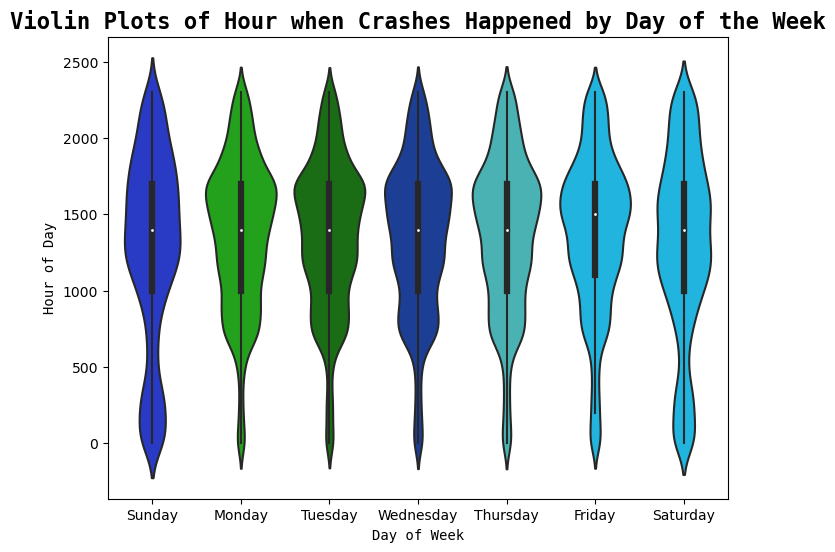

In [31]:
# Violin Plots showing distribution
plt.figure(figsize=(8,6))
ax = sns.violinplot(data=df, 
               x="day", 
               y="hour",
              palette=["#0f26df", "#10b706", "#0d7b07", "#0837a9", "#38c3c4", "#00c6ff", "#00c6ff"])
ax.set_xticklabels(["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

plt.title("Violin Plots of Hour when Crashes Happened by Day of the Week", fontweight="bold", fontsize=16, fontfamily="monospace")
plt.xlabel("Day of Week", fontfamily="monospace")
plt.ylabel("Hour of Day", fontfamily="monospace")

plt.show

In [5]:
# Extract day of week
sun=df.loc[df.day == 1, "hour"]
mon=df.loc[df.day == 2, "hour"]
tues=df.loc[df.day == 3, "hour"]
wed=df.loc[df.day == 4, "hour"]
thur=df.loc[df.day == 5, "hour"]
fri=df.loc[df.day == 6, "hour"]
sat=df.loc[df.day == 7, "hour"]

In [6]:
# Full Hypothesis

# H0: This is no difference in time of accidents between any group
# HA: There is a difference in time of accidents between any group

In [7]:
# ANOVA
stats.f_oneway(sun, mon, tues, wed, thur, fri, sat)

F_onewayResult(statistic=34.972520372232026, pvalue=1.8668260309203273e-42)

In [8]:
# Full Hypothesis

# H0: This is no difference in time of accidents between any group
# HA: There is a difference in time of accidents between any group

In [9]:
# T-tests for Sunday
print(stats.ttest_ind(sun, sun, equal_var=False))
print(stats.ttest_ind(sun, mon, equal_var=False))
print(stats.ttest_ind(sun, tues, equal_var=False))
print(stats.ttest_ind(sun, wed, equal_var=False))
print(stats.ttest_ind(sun, thur, equal_var=False))
print(stats.ttest_ind(sun, fri, equal_var=False))
print(stats.ttest_ind(sun, sat, equal_var=True))

TtestResult(statistic=0.0, pvalue=1.0, df=10190.0)
TtestResult(statistic=-8.941345616726114, pvalue=4.588575332921759e-19, df=9204.557888006277)
TtestResult(statistic=-7.66202219264, pvalue=2.0200737230142433e-14, df=8989.208698603596)
TtestResult(statistic=-6.361807717676779, pvalue=2.0886018771592446e-10, df=9233.056493157901)
TtestResult(statistic=-8.299725016856902, pvalue=1.1898487350561067e-16, df=9255.716573694943)
TtestResult(statistic=-9.975458753956067, pvalue=2.5911420194353023e-23, df=8848.433174117654)
TtestResult(statistic=-1.867372347938079, pvalue=0.0618734702255353, df=12251.0)


In [10]:
# Reject the null hypothesis for all days except Saturday where we fail to reject the null hypothesis
# There is a significant difference between Sunday and all other days of the week, except Saturday

# While the p-value is close to 0.05 between Saturday and Sunday, given the significance of the p-value for sunday and all other days of the week,
# comparatively, Saturday isn't significant

In [11]:
# T-tests for Monday
print(stats.ttest_ind(mon, tues, equal_var=True))
print(stats.ttest_ind(mon, wed, equal_var=True))
print(stats.ttest_ind(mon, thur, equal_var=True))
print(stats.ttest_ind(mon, fri, equal_var=True))
print(stats.ttest_ind(mon, sat, equal_var=False))

TtestResult(statistic=1.813699896341775, pvalue=0.06974357568396897, df=15259.0)
TtestResult(statistic=3.3473939275866567, pvalue=0.0008177579950122274, df=14996.0)
TtestResult(statistic=0.8439342110641541, pvalue=0.39871943788799924, df=15215.0)
TtestResult(statistic=-1.082806444766679, pvalue=0.2789099416620765, df=16739.0)
TtestResult(statistic=7.905326934229422, pvalue=2.875295700925435e-15, df=13718.963005729744)


In [12]:
# Reject the null hypothesis for Wednesday and Saturday while we fail to reject for Tuesday, Thursday, and Friday
# There is a significant difference between Monday and both Wednesday and Saturday, while the other 3 days are not significant

# While the p-value is close to 0.05 between Tuesday and Monday, given the significance of the p-value for Wednesday and Saturday, 
# 0.07 isn't that significant. Additionally, this is consistent with the determination for Saturday and Sunday

In [13]:
# T-tests for Tuesday
print(stats.ttest_ind(tues, wed, equal_var=True))
print(stats.ttest_ind(tues, thur, equal_var=True))
print(stats.ttest_ind(tues, fri, equal_var=True))
print(stats.ttest_ind(tues, sat, equal_var=False))

TtestResult(statistic=1.604096724194764, pvalue=0.10871289326436286, df=15665.0)
TtestResult(statistic=-0.9548130461749321, pvalue=0.33968677911002787, df=15884.0)
TtestResult(statistic=-2.990226178927103, pvalue=0.0027916073663610025, df=17408.0)
TtestResult(statistic=6.442035775468931, pvalue=1.2180504021194856e-10, df=13750.043388957178)


In [14]:
# Reject the null hypothesis for Friday and Saturday while we fail to reject for Wednesday and Thursday
# There is a significant difference between Tuesday and both Friday and Saturday while the other 2 days are not significant

In [15]:
# T-tests for Wednesday
print(stats.ttest_ind(wed, thur, equal_var=True))
print(stats.ttest_ind(wed, fri, equal_var=True))
print(stats.ttest_ind(wed, sat, equal_var=False))

TtestResult(statistic=-2.509621759843957, pvalue=0.012096087010839768, df=15621.0)
TtestResult(statistic=-4.560665575376725, pvalue=5.134474433853389e-06, df=17145.0)
TtestResult(statistic=4.962524562858517, pvalue=7.040610408011587e-07, df=13903.98611324832)


In [16]:
# Reject the null hypothesis for all days
# There is a significant difference between Wednesday and Thursday, Friday, and Saturday
# However, there is a more significant difference in when accidents occur on Wednesday vs. Friday and Saturday than between Wednesday and Thursday

In [17]:
# T-tests for Thursday
print(stats.ttest_ind(thur, fri, equal_var=True))
print(stats.ttest_ind(thur, sat, equal_var=False))

TtestResult(statistic=-1.9684513757480029, pvalue=0.0490320080999631, df=17364.0)
TtestResult(statistic=7.1733982936045875, pvalue=7.683041537187214e-13, df=14004.686382795351)


In [18]:
# Reject the null hypothesis for both Friday and Saturday
# There is a significant difference between when accidents occur on Thursday compared to Friday and Saturday

In [19]:
# T-tests for Friday
print(stats.ttest_ind(fri, sat, equal_var=False))

TtestResult(statistic=9.095757013797511, pvalue=1.0646838866459606e-19, df=13930.128746235501)


In [20]:
# Reject the null hypothesis
# There is a significant difference between when accidents occur on Friday and Saturday

### p-value Heatmap for Hours of Day per Day of Week
---
Given how strong the correlation is between many of the Days of the week, any values under 0.05 are being considered insignificant
Source (formatting): https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77

In [21]:
# T-tests for Sunday
stat01 = stats.ttest_ind(sun, sun, equal_var=False)[1]
stat11 = stats.ttest_ind(sun, mon, equal_var=False)[1]
stat21 = stats.ttest_ind(sun, tues, equal_var=False)[1]
stat31 = stats.ttest_ind(sun, wed, equal_var=False)[1]
stat41 = stats.ttest_ind(sun, thur, equal_var=False)[1]
stat51 = stats.ttest_ind(sun, fri, equal_var=False)[1]
stat61 = stats.ttest_ind(sun, sat, equal_var=True)[1]

In [22]:
# T-tests for Monday
stat02 = stats.ttest_ind(mon, sun, equal_var=False)[1]
stat12 = stats.ttest_ind(mon, mon, equal_var=False)[1]
stat22 = stats.ttest_ind(mon, tues, equal_var=False)[1]
stat32 = stats.ttest_ind(mon, wed, equal_var=False)[1]
stat42 = stats.ttest_ind(mon, thur, equal_var=False)[1]
stat52 = stats.ttest_ind(mon, fri, equal_var=False)[1]
stat62 = stats.ttest_ind(mon, sat, equal_var=True)[1]

In [23]:
# T-tests for Tuesday
stat03 = stats.ttest_ind(tues, sun, equal_var=False)[1]
stat13 = stats.ttest_ind(tues, mon, equal_var=False)[1]
stat23 = stats.ttest_ind(tues, tues, equal_var=False)[1]
stat33 = stats.ttest_ind(tues, wed, equal_var=False)[1]
stat43 = stats.ttest_ind(tues, thur, equal_var=False)[1]
stat53 = stats.ttest_ind(tues, fri, equal_var=False)[1]
stat63 = stats.ttest_ind(tues, sat, equal_var=True)[1]

In [24]:
# T-tests for Wednesday
stat04 = stats.ttest_ind(wed, sun, equal_var=False)[1]
stat14 = stats.ttest_ind(wed, mon, equal_var=False)[1]
stat24 = stats.ttest_ind(wed, tues, equal_var=False)[1]
stat34 = stats.ttest_ind(wed, wed, equal_var=False)[1]
stat44 = stats.ttest_ind(wed, thur, equal_var=False)[1]
stat54 = stats.ttest_ind(wed, fri, equal_var=False)[1]
stat64 = stats.ttest_ind(wed, sat, equal_var=True)[1]

In [25]:
# T-tests for Thursday
stat05 = stats.ttest_ind(thur, sun, equal_var=False)[1]
stat15 = stats.ttest_ind(thur, mon, equal_var=False)[1]
stat25 = stats.ttest_ind(thur, tues, equal_var=False)[1]
stat35 = stats.ttest_ind(thur, wed, equal_var=False)[1]
stat45 = stats.ttest_ind(thur, thur, equal_var=False)[1]
stat55 = stats.ttest_ind(thur, fri, equal_var=False)[1]
stat65 = stats.ttest_ind(thur, sat, equal_var=True)[1]

In [26]:
# T-tests for Friday
stat06 = stats.ttest_ind(fri, sun, equal_var=False)[1]
stat16 = stats.ttest_ind(fri, mon, equal_var=False)[1]
stat26 = stats.ttest_ind(fri, tues, equal_var=False)[1]
stat36 = stats.ttest_ind(fri, wed, equal_var=False)[1]
stat46 = stats.ttest_ind(fri, thur, equal_var=False)[1]
stat56 = stats.ttest_ind(fri, fri, equal_var=False)[1]
stat66 = stats.ttest_ind(fri, sat, equal_var=True)[1]

In [27]:
# T-tests for Saturday
stat07 = stats.ttest_ind(sat, sun, equal_var=False)[1]
stat17 = stats.ttest_ind(sat, mon, equal_var=False)[1]
stat27 = stats.ttest_ind(sat, tues, equal_var=False)[1]
stat37 = stats.ttest_ind(sat, wed, equal_var=False)[1]
stat47 = stats.ttest_ind(sat, thur, equal_var=False)[1]
stat57 = stats.ttest_ind(sat, fri, equal_var=False)[1]
stat67 = stats.ttest_ind(sat, sat, equal_var=True)[1]

In [28]:
# Create new DataFrame
data = {"Sunday": [stat01, stat11, stat21, stat31, stat41, stat51, stat61],
        "Monday": [stat02, stat12, stat22, stat32, stat42, stat52, stat62],
        "Tuesday": [stat03, stat13, stat23, stat33, stat43, stat53, stat63],
        "Wednesday": [stat04, stat14, stat24, stat34, stat44, stat54, stat64],
        "Thursday": [stat05, stat15, stat25, stat35, stat45, stat55, stat65],
        "Friday": [stat06, stat16, stat26, stat36, stat46, stat56, stat66],
        "Saturday": [stat07, stat17, stat27, stat37, stat47, stat57, stat67],
       }

data_df = pd.DataFrame(data)
data_df

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1.000000e+00,4.588575e-19,2.020074e-14,2.088602e-10,1.189849e-16,2.591142e-23,6.321616e-02
1,4.588575e-19,1.000000e+00,6.973190e-02,8.115537e-04,3.980088e-01,2.758735e-01,2.875296e-15
2,2.020074e-14,6.973190e-02,1.000000e+00,1.088456e-01,3.397346e-01,2.681362e-03,1.218050e-10
3,2.088602e-10,8.115537e-04,1.088456e-01,1.000000e+00,1.207998e-02,4.849072e-06,7.040610e-07
4,1.189849e-16,3.980088e-01,3.397346e-01,1.207998e-02,1.000000e+00,4.878283e-02,7.683042e-13
5,2.591142e-23,2.758735e-01,2.681362e-03,4.849072e-06,4.878283e-02,1.000000e+00,1.064684e-19
6,6.187347e-02,2.517403e-15,7.489740e-11,5.882994e-07,4.773495e-13,1.509038e-20,1.000000e+00


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1.000000e+00,4.588575e-19,2.020074e-14,2.088602e-10,1.189849e-16,2.591142e-23,6.321616e-02
1,4.588575e-19,1.000000e+00,6.973190e-02,8.115537e-04,3.980088e-01,2.758735e-01,2.875296e-15
2,2.020074e-14,6.973190e-02,1.000000e+00,1.088456e-01,3.397346e-01,2.681362e-03,1.218050e-10
3,2.088602e-10,8.115537e-04,1.088456e-01,1.000000e+00,1.207998e-02,4.849072e-06,7.040610e-07
4,1.189849e-16,3.980088e-01,3.397346e-01,1.207998e-02,1.000000e+00,4.878283e-02,7.683042e-13
5,2.591142e-23,2.758735e-01,2.681362e-03,4.849072e-06,4.878283e-02,1.000000e+00,1.064684e-19
6,6.187347e-02,2.517403e-15,7.489740e-11,5.882994e-07,4.773495e-13,1.509038e-20,1.000000e+00


<function matplotlib.pyplot.show(close=None, block=None)>

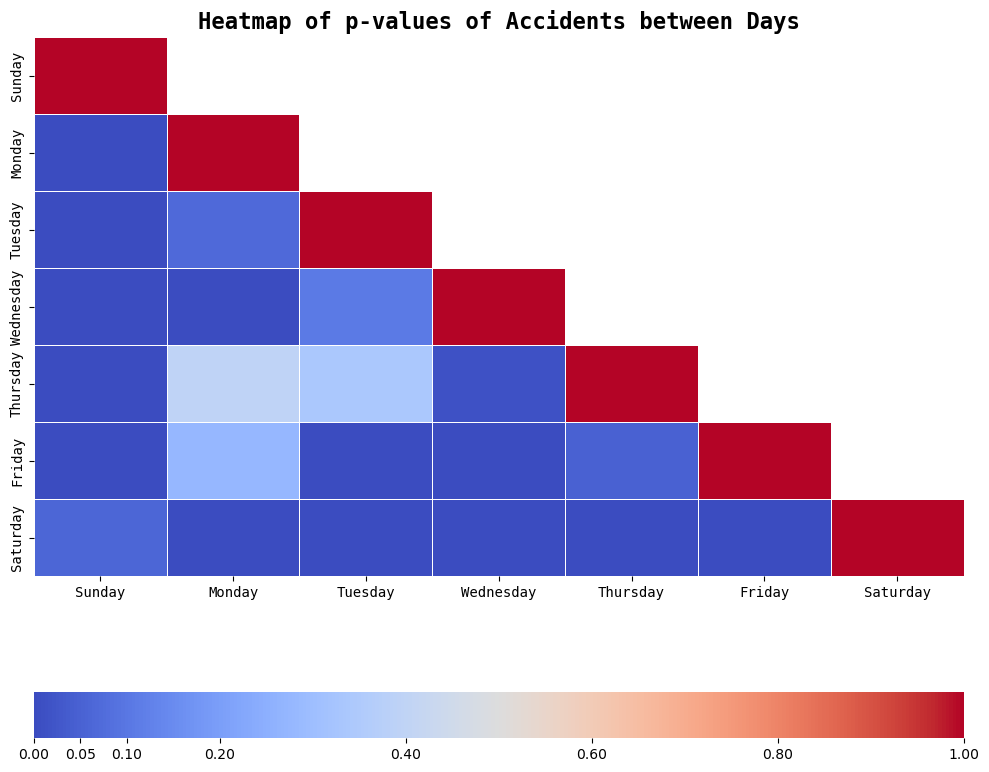

In [29]:
plt.figure(figsize=(12,10))

# mask the correlation matrix to diagonal (from https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77)
mask = np.zeros_like(data_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

# Creating a heatmap
sns.heatmap(data_df, 
            cmap="coolwarm", 
            yticklabels=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"],
           mask=mask,
           linewidth=0.5,
            cbar_kws={"ticks":[0.0, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1],
                     "orientation": "horizontal"},
           vmin=0,
           vmax=1)

plt.xticks(fontfamily="monospace")
plt.yticks(fontfamily="monospace")
plt.title("Heatmap of p-values of Accidents between Days", fontweight="bold", fontsize=16, fontfamily="monospace") 


display(data_df)
plt.show

In [30]:
# 
corrs = df.corr(numeric_only=True)
